In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from numpy import unique
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt 

In [2]:
# Load Movies Metadata
data = pd.read_csv('user_like_new.csv', low_memory=False)
# Print the first three rows
print(data.head())
print ("DataFrame size:", data.shape)
media_id_vec= data['media_id'].unique()
print("Number of  medias", len(media_id_vec))
user_id_vec = data['user_id'].unique()
print("Number of users:", len(user_id_vec))

                               media_id   media_type  \
0  4f81266d-8862-4137-872c-12e672919018        VIDEO   
1  f724d4c4-5003-4b90-8026-a1d2cf6a7974  SHORT_VIDEO   
2  897e89b6-5ee4-4d5a-b093-a541d279b9d3        VIDEO   
3  ff83b0f1-2b66-411c-8edb-e28531e37c92  SHORT_VIDEO   
4  55602748-ec9a-41a7-ace4-3305a781458d        VIDEO   

                                user_id                  liked_date  
0  73f8f843-0af1-4bca-b6c4-be163c2f299d  2022-07-30 21:40:41.761000  
1  9651d425-a857-4896-b39c-e2523b45588c  2022-07-30 21:37:51.638000  
2  982472af-02dc-44c4-a4b0-3d8423cc9a5c  2022-07-31 16:30:39.653000  
3  20807b4a-dda2-4cf5-99b8-17c16cb2b359  2022-07-31 17:12:27.486000  
4  8272b4ba-326c-4a6f-9552-236d8ae9357b  2022-08-01 01:01:59.285000  
DataFrame size: (14491, 4)
Number of  medias 5108
Number of users: 6226


In [3]:
count = 0 
user_liked_list = []
for u_item in user_id_vec:
	mforu_valus=data[data['user_id']== u_item]['media_id'].value_counts()
	if (mforu_valus.sum() != len (mforu_valus)):
		count=count+1
	user_liked_list.append(mforu_valus.sum())

count_u =0
media_liked_list = []
for m_item in media_id_vec:
	uform_valus=data[data['media_id']== m_item]['user_id'].value_counts()
	#if (uform_valus.sum() == 0):
	#	count_u=count_u+1
	media_liked_list.append(uform_valus.sum())
    
print(count, "Number of users liked an item more than once")
#print(count_u, "NUmber of items have never been liked by any user")


0 Number of users liked an item more than once


/tmp/ipykernel_16736/1151055443.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

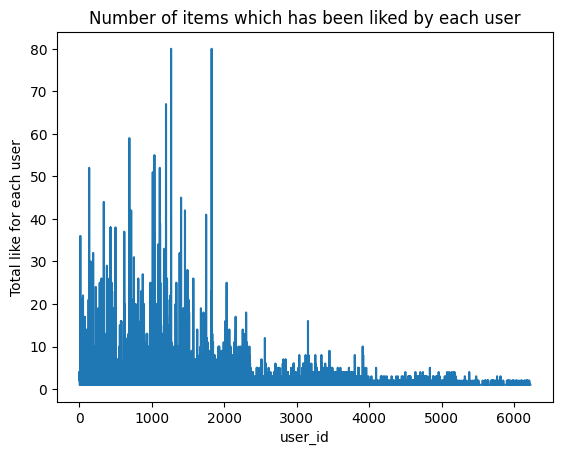

In [4]:
f = plt.figure(1)
g = plt.figure(2)
h = plt.figure(3)
k = plt.figure(4)
x = list (range(len (user_liked_list)))
plt.plot(x, user_liked_list)
plt.xlabel('user_id')
# naming the y axis
plt.ylabel('Total like for each user')
  
# giving a title to my graph
plt.title('Number of items which has been liked by each user')
f.show()


/tmp/ipykernel_16736/2286559567.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


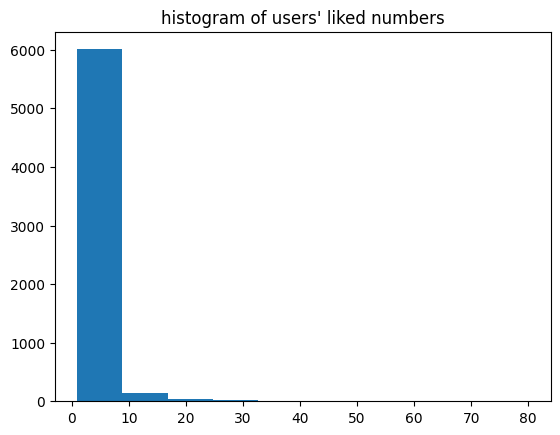

In [5]:
plt.hist(user_liked_list)
plt.title("Histogram of users' liked numbers")
g.show() 

/tmp/ipykernel_16736/2344697953.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


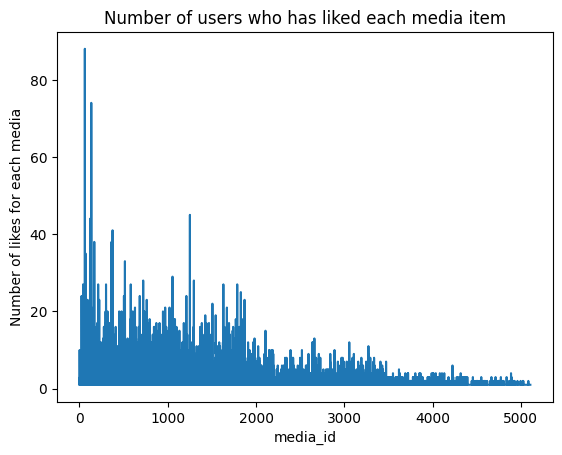

In [8]:
x = list (range(len (media_liked_list)))
plt.plot(x, media_liked_list)
plt.xlabel('media_id')
# naming the y axis
plt.ylabel('Number of likes for each media')
# giving a title to my graph
plt.title('Number of users who has liked each media item')
# function to show the plot
h.show()

/tmp/ipykernel_16736/301348132.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  k.show()


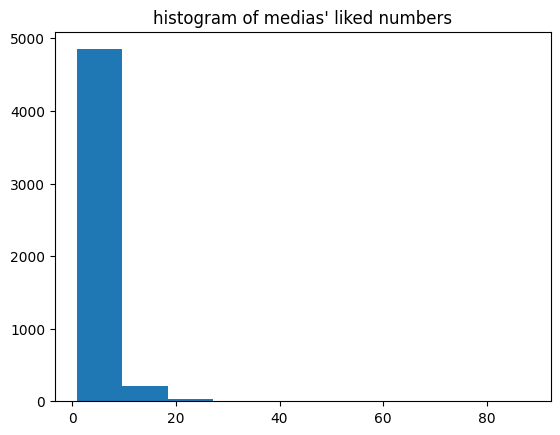

In [7]:
plt.hist(media_liked_list)
plt.title("Histogram of medias' liked numbers")
k.show()